<a href="https://colab.research.google.com/github/shunitavni/BackPropagation/blob/master/BackPropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

implement a full backprop algorithm using only *numpy*.

- We assume sigmoid activation across all layers.
- We assume a single value in the output layer

In [ ]:
import numpy as np
from google.colab import drive
import pandas as pd
from sklearn.utils import shuffle

The following class represents a simple feed forward network with multiple layers. The network class provides methods for running forward and backward for a single instance, throught the network. You should implement the methods (indicated with TODO), that performs forward and backward for an entire batch. Note, the idea is to use matrix multiplications, and not running standard loops over the instances in the batch.

In [ ]:
class MyNN:
  def __init__(self, learning_rate, layer_sizes):
    '''
    learning_rate - the learning to use in backward
    layer_sizes - a list of numbers, each number represents the number of neurons
                  to have in every layer. Therefore, the length of the list 
                  represents the number of layers this network has.
    '''
    self.learning_rate = learning_rate
    self.layer_sizes = layer_sizes
    self.model_params = {}
    self.memory = {}
    self.grads = {}
    
    # Initializing weights
    for layer_index in range(len(layer_sizes) - 1):
      W_input = layer_sizes[layer_index + 1]
      W_output = layer_sizes[layer_index]
      self.model_params['W_' + str(layer_index + 1)] = np.random.randn(W_input, W_output) * 0.1
      self.model_params['b_' + str(layer_index + 1)] = np.random.randn(W_input) * 0.1
      
      
  def forward_single_instance(self, x):    
    a_i_1 = x
    self.memory['a_0'] = x
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      z_i = np.dot(W_i, a_i_1) + b_i
      a_i = 1/(1+np.exp(-z_i))
      self.memory['a_' + str(layer_index + 1)] = a_i
      a_i_1 = a_i
    return a_i_1
  
  
  def log_loss(y_hat, y):
    '''
    Logistic loss, assuming a single value in y_hat and y.
    '''
    m = y_hat[0]
    cost = -y[0]*np.log(y_hat[0]) - (1 - y[0])*np.log(1 - y_hat[0])
    return cost
  
  def backward_single_instance(self, y):
    a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
    dz = a_output - y
     
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      print(layer_index)
      a_l_1 = self.memory['a_' + str(layer_index - 1)]
      self.grads['db_' + str(layer_index)] = dz.reshape((-1,));
      dW = np.dot(dz.reshape(-1, 1), a_l_1.reshape(1, -1))
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      dz = (a_l_1 * (1 - a_l_1)).reshape(-1, 1) * np.dot(W_l.T, dz.reshape(-1, 1))

  
  # TODO: update weights with grads
  def update(self):
    for layer_index in range(len(self.layer_sizes) - 1):
        #print(layer_index);
        self.model_params['W_' + str(layer_index + 1)] -= self.learning_rate * self.grads['dW_' + str(layer_index + 1)]
        self.model_params['b_' + str(layer_index + 1)] -= self.learning_rate * self.grads['db_' + str(layer_index + 1)]
  
  # TODO: implement forward for a batch X.shape = (network_input_size, number_of_instance)
  def forward_batch(self, X):
    a_i_1 = X
    self.memory['a_0'] = X
    for layer_index in range(len(self.layer_sizes) - 1):
      W_i = self.model_params['W_' + str(layer_index + 1)]
      b_i = self.model_params['b_' + str(layer_index + 1)]
      z_i = np.dot(W_i, a_i_1) + b_i.reshape(-1,1);
      a_i = 1/(1+np.exp(-z_i))
      self.memory['a_' + str(layer_index + 1)] = a_i
      a_i_1 = a_i
    return a_i_1     
  
  # TODO: implement backward for a batch y.shape = (1, number_of_instance)
  def backward_batch(self, y):
    a_output = self.memory['a_' + str(len(self.layer_sizes) - 1)]
    dz = a_output - y
     
    for layer_index in range(len(self.layer_sizes) - 1, 0, -1):
      #print(layer_index)
      a_l_1 = self.memory['a_' + str(layer_index - 1)]
      self.grads['db_' + str(layer_index)] = np.mean(dz)#np.sum(dz);
      dW = np.dot(dz,a_l_1.T) / 8;
      #dW = np.dot(dz.reshape(-1, 1), a_l_1.reshape(1, -1))
      self.grads['dW_' + str(layer_index)] = dW
      W_l = self.model_params['W_' + str(layer_index)]
      dz = (a_l_1 * (1 - a_l_1)) * np.dot(W_l.T, dz)
      
  
  # TODO: implement log_loss_batch, for a batch of instances
  def log_loss_batch(self, y_hat, y):
      return np.mean((-y*np.log(y_hat)) - ((1-y)*np.log(1-y_hat)))

In [ ]:
# Create a simple neural network to test single propogation
nn = MyNN(0.01, [3, 2, 1])
# Print the model parameters
nn.model_params
# Create mock data
x = np.random.randn(3)
y = np.random.randn(1)
# Forward
y_hat = nn.forward_single_instance(x)
# Backward
nn.backward_single_instance(y)


2
1


In [ ]:
# Define the train function for both batch and single implementations
def train(X, y, epochs, batch_size):
  for e in range(1, epochs + 1):
    epoch_loss = 0
    #shuffle
    X_shuffle,y_shuffle= shuffle(X.T,y.T)
    X_shuffle = X_shuffle.T
    y_shuffle = y_shuffle.T
    #divide to batches
    numBatches = X_shuffle.shape[1]/batch_size
    batches = zip(np.split(X_shuffle,numBatches,axis=1),np.split(y_shuffle,numBatches,axis=1))
    for X_b, y_b in batches:
      y_hat = nn.forward_batch(X_b)
      epoch_loss += nn.log_loss_batch(y_hat, y_b)
      nn.backward_batch(y_b)
      nn.update()
    print(f'Epoch {e}, loss={epoch_loss/numBatches}')

In [ ]:
#Make sure the following network trains properly

# Create a dense feed forward network
nn = MyNN(0.001, [6, 4, 3, 1])

# Mock features
X = np.random.randn(6, 100)
# Mock Labels
y = np.random.randn(1, 100)
batch_size = 8
epochs = 2

train(X, y, epochs, batch_size)

Epoch 1, loss=0.6101103228733691
Epoch 2, loss=0.6058136101347806


#TODO: train on an external dataset

Train on the Bike Sharing dataset, using the same split as in *DL Notebook 4 - logistic regression*.
Use the following features from the data:

* temp
* atemp
* hum
* windspeed
* weekday

The response variable is, like in Notebook 4, raw["success"] = raw["cnt"] > (raw["cnt"].describe()["mean"]).

The architecture of the network should be: [5, 40, 30, 10, 7, 5, 3, 1].

Use batch_size=8, and train it for 100 epochs on the train set (based on the split as requested above).

Then, plot loss per epoch.

In [ ]:
# Imports
from google.colab import drive
import pandas as pd
import numpy as np

# Mount the drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# Load the data
raw = pd.read_csv('/content/drive/My Drive/DL Course/Assignment 1/day.csv')
# Show the head of the data
raw.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Create the dataset

# Feature space
X = np.array([raw["temp"].values,raw["atemp"].values,raw["hum"].values,raw["windspeed"].values,raw["weekday"].values]).T
# Labels space
result = np.array((raw["cnt"] > (raw["cnt"].describe()["mean"])).values);
y = np.where(result == True,1,0);

In [ ]:
# Split to training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [ ]:
# Create a dense feed forward network
nn = MyNN(0.001,  [5, 40, 30, 10, 7, 5, 3, 1])
batch_size = 8
epochs = 100

train(X_train.T, y_train.reshape(1,-1), epochs, batch_size)

Epoch 1, loss=0.6836594854985163
Epoch 2, loss=0.683661403355386
Epoch 3, loss=0.6836671242198937
Epoch 4, loss=0.6836552038813869
Epoch 5, loss=0.683660182728087
Epoch 6, loss=0.683658011728688
Epoch 7, loss=0.6836482206158816
Epoch 8, loss=0.6836511684592725
Epoch 9, loss=0.6836507747184973
Epoch 10, loss=0.6836419753733919
Epoch 11, loss=0.6836503112584242
Epoch 12, loss=0.6836356603923054
Epoch 13, loss=0.6836493023083159
Epoch 14, loss=0.6836563500779179
Epoch 15, loss=0.68365934113999
Epoch 16, loss=0.683652780368265
Epoch 17, loss=0.6836572068791072
Epoch 18, loss=0.6836397878528199
Epoch 19, loss=0.683659966112989
Epoch 20, loss=0.6836316815967406
Epoch 21, loss=0.6836346967827212
Epoch 22, loss=0.6836316859129873
Epoch 23, loss=0.6836268454856907
Epoch 24, loss=0.6836510481523681
Epoch 25, loss=0.6836504782163374
Epoch 26, loss=0.6836448711694286
Epoch 27, loss=0.6836433454980475
Epoch 28, loss=0.68363612355509
Epoch 29, loss=0.6836418693466276
Epoch 30, loss=0.683636086339341

In [ ]:
# Use the network to predict the values for X_test
pred = nn.forward_batch(X_test.T);
# This architecture does not seem to be a fitting hypothesis for the data set.
# using a trivial treshold function (1 if y_pred > 0.5) returns false for all the test set.
y_pred = np.where(pred > 0.5,1,0).reshape(-1,1);

In [ ]:
y_test = y_test.reshape(-1,1);

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00       106
     class 1       0.52      1.00      0.68       114

    accuracy                           0.52       220
   macro avg       0.26      0.50      0.34       220
weighted avg       0.27      0.52      0.35       220



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


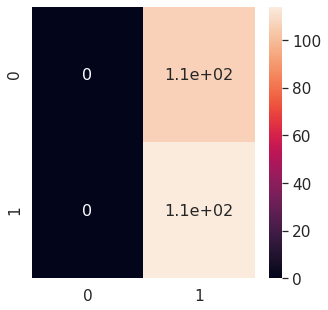

In [ ]:
target_names = ['class 0', 'class 1'];
print(classification_report(y_test, y_pred, target_names=target_names))
# Plot non-normalized confusion matrix
cm = confusion_matrix(y_test, y_pred);
df_cm = pd.DataFrame(cm, range(len(cm)),
                  range(len(cm)))

plt.figure(figsize=(5,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

plt.show()